# CRTC Hearing Text Analysis

The purpose of this notebook is to illustrate the method of text analysis using a corpus created from digital content published by the CRTC. This is the second part in a two-part process, the first of which is a description of the code that 'scraped' the CRTC webpage to create the corpus. 

In [1]:
# importing code modules
import json
import ijson
from ijson import items
import pandas as pd
import pprint
import nltk
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import csv
import sys
import codecs
import nltk
import nltk.collocations
import collections
import statistics
from nltk.metrics.spearman import *
from nltk.collocations import *
from nltk.stem import WordNetLemmatizer
from tabulate import tabulate

In [2]:
# loading the JSON file
filename = "../scrapy/result20.json"

In [3]:
# shows the structure of the json file
for prefix, the_type, value in ijson.parse(open(filename)):
    print(prefix, the_type, value)

 start_array None
item start_map None
item map_key keywords
item.keywords string Broadcasting
item map_key dateMod
item.dateMod string 
item map_key subject
item.subject string Broadcasting
item map_key date
item.date string 1997-08-21
item map_key dateCreated
item.dateCreated string 
item map_key dateIssued
item.dateIssued string 2007-09-20
item map_key title
item.title string ARCHIVED - Central Okanagan Re-Broadcast Society - Licence renewal
item map_key docType
item.docType string Decisions
item map_key text
item.text string ARCHIVED -  
Decision CRTC 97-477 Decision Ottawa, 21 August 1997 Decision CRTC 97-477 Central Okanagan Re-Broadcast Society Winfield, British Columbia - 199613310 Licence renewal 1. Following Public Notice CRTC 1997-65 dated 26 May 1997, the Commission renews the broadcasting licence for the radiocommunication distribution undertaking serving Winfield from 1 September 1997 to 31 August 2004, subject to the conditions in effect under the current licence, as well

In [4]:
# reads the file and assigns the keys and values to a Python dictionary structure
with open(filename, 'r') as f:
    objects = ijson.items(f, 'item')
    file = list(objects)

In [5]:
# checks to see how many records we're viewing
print(len(file))

6


In [8]:
# prints all records in the file
file[0]

{'date': '1997-08-21',
 'dateCreated': '',
 'dateIssued': '2007-09-20',
 'dateMod': '',
 'docType': 'Decisions',
 'file': 'DB97-477',
 'keywords': 'Broadcasting',
 'subject': 'Broadcasting',
 'text': 'ARCHIVED\xa0-\xa0 \r\nDecision CRTC 97-477 Decision Ottawa, 21 August 1997 Decision CRTC 97-477 Central Okanagan Re-Broadcast Society Winfield, British Columbia - 199613310 Licence renewal 1. Following Public Notice CRTC 1997-65 dated 26 May 1997, the Commission renews the broadcasting licence for the radiocommunication distribution undertaking serving Winfield from 1 September 1997 to 31 August 2004, subject to the conditions in effect under the current licence, as well as to those conditions specified in the licence to be issued. 2. The Commission notes that this undertaking distributes, in non-encrypted mode, the programming services of The Open Learning Agency (Knowledge Network), on channel 34, with a transmitter power of 100 watts, and CBU-FM Vancouver, on the frequency 91.9 MHz, ch

In [9]:
# iterates through each record in the file
for row in file:
    # prints each record based on the 'key' value
    print(row['docType'],":",row['title'])

Decisions : ARCHIVED - Central Okanagan Re-Broadcast Society - Licence renewal
Decisions : ARCHIVED - Increase in power for CHKG-FM
Orders : Various companies – Interim approval of tariff applications
Notices of consultation : ARCHIVED - Terms and conditions of existing agreements for access to municipal property
Decisions : ARCHIVED - Hustler TV and X Channel - Amendment to the definition of broadcast day
Information bulletins : Procedures for television services in non-compliance with logging requirements


In [10]:
# creates a list of the file numbers
file_nums = []
for row in file:
    file_nums.append(row['file'])

In [20]:
file_nums

['DB97-477', 'DB97-626', '2017-73', 'PT2001-99', 'db2005-362', '2011-650']

In [24]:
# collects all of the words from the 'text' key
all_chars = []
for row in file:
    # splits the text into a list of words
    text = nltk.word_tokenize(row['text'])
    # makes all words lowercase
    clean = [w.lower() for w in text]
    all_chars.append(clean)

In [25]:
print(all_chars)

[['archived', '-', 'decision', 'crtc', '97-477', 'decision', 'ottawa', ',', '21', 'august', '1997', 'decision', 'crtc', '97-477', 'central', 'okanagan', 're-broadcast', 'society', 'winfield', ',', 'british', 'columbia', '-', '199613310', 'licence', 'renewal', '1', '.', 'following', 'public', 'notice', 'crtc', '1997-65', 'dated', '26', 'may', '1997', ',', 'the', 'commission', 'renews', 'the', 'broadcasting', 'licence', 'for', 'the', 'radiocommunication', 'distribution', 'undertaking', 'serving', 'winfield', 'from', '1', 'september', '1997', 'to', '31', 'august', '2004', ',', 'subject', 'to', 'the', 'conditions', 'in', 'effect', 'under', 'the', 'current', 'licence', ',', 'as', 'well', 'as', 'to', 'those', 'conditions', 'specified', 'in', 'the', 'licence', 'to', 'be', 'issued', '.', '2', '.', 'the', 'commission', 'notes', 'that', 'this', 'undertaking', 'distributes', ',', 'in', 'non-encrypted', 'mode', ',', 'the', 'programming', 'services', 'of', 'the', 'open', 'learning', 'agency', '(', 

In [26]:
# counting the number of words in each record (includes punctuation and spaces)
for each, num in zip(all_chars, file_nums):
    print(num, ":", len(each), "words")

DB97-477 : 184 words
DB97-626 : 330 words
2017-73 : 148 words
PT2001-99 : 1193 words
db2005-362 : 363 words
2011-650 : 510 words


In [14]:
# removes all numbers, punctuation, and extra characters
only_words = []
for row in file:
    text = nltk.word_tokenize(row['text'])
    clean = [w.lower() for w in text if w.isalpha()]
    only_words.append(clean)  

In [15]:
print(only_words[0])

['archived', 'decision', 'crtc', 'decision', 'ottawa', 'august', 'decision', 'crtc', 'central', 'okanagan', 'society', 'winfield', 'british', 'columbia', 'licence', 'renewal', 'following', 'public', 'notice', 'crtc', 'dated', 'may', 'the', 'commission', 'renews', 'the', 'broadcasting', 'licence', 'for', 'the', 'radiocommunication', 'distribution', 'undertaking', 'serving', 'winfield', 'from', 'september', 'to', 'august', 'subject', 'to', 'the', 'conditions', 'in', 'effect', 'under', 'the', 'current', 'licence', 'as', 'well', 'as', 'to', 'those', 'conditions', 'specified', 'in', 'the', 'licence', 'to', 'be', 'issued', 'the', 'commission', 'notes', 'that', 'this', 'undertaking', 'distributes', 'in', 'mode', 'the', 'programming', 'services', 'of', 'the', 'open', 'learning', 'agency', 'knowledge', 'network', 'on', 'channel', 'with', 'a', 'transmitter', 'power', 'of', 'watts', 'and', 'vancouver', 'on', 'the', 'frequency', 'mhz', 'channel', 'with', 'an', 'effective', 'radiated', 'power', 'of

In [16]:
# counting the number of words in each record 
for num, each in zip(file_nums,only_words):
    print(num, ":",len(each), "words")

DB97-477 : 126 words
DB97-626 : 259 words
2017-73 : 112 words
PT2001-99 : 857 words
db2005-362 : 288 words
2011-650 : 442 words


In [17]:
# counts the occurence of each word in the file
for each in only_words:
    wordcounts = dict([ [t, each.count(t)] for t in set(each) ])

In [40]:
wordcounts

{'a': 19,
 'accuracy': 1,
 'advised': 1,
 'affected': 1,
 'after': 2,
 'again': 1,
 'aired': 1,
 'all': 1,
 'allotted': 1,
 'also': 1,
 'and': 9,
 'any': 3,
 'applications': 3,
 'approach': 2,
 'appropriate': 3,
 'are': 1,
 'as': 3,
 'attesting': 1,
 'b': 2,
 'be': 2,
 'beginning': 1,
 'breach': 1,
 'broadcasting': 1,
 'bulletin': 2,
 'by': 4,
 'canadian': 1,
 'case': 1,
 'category': 2,
 'certificate': 1,
 'commission': 10,
 'compliance': 1,
 'computer': 1,
 'concerning': 1,
 'condition': 1,
 'contents': 1,
 'continue': 1,
 'continues': 1,
 'contribute': 1,
 'could': 2,
 'crtc': 1,
 'current': 3,
 'date': 3,
 'days': 3,
 'deadlines': 1,
 'decided': 1,
 'decision': 1,
 'describe': 1,
 'do': 2,
 'each': 1,
 'end': 1,
 'ensure': 1,
 'existing': 1,
 'extensions': 1,
 'fail': 2,
 'failed': 1,
 'fails': 1,
 'file': 1,
 'filing': 1,
 'first': 1,
 'following': 1,
 'for': 6,
 'format': 1,
 'from': 5,
 'fund': 1,
 'further': 1,
 'future': 2,
 'general': 3,
 'given': 1,
 'has': 3,
 'however': 1,


In [19]:
# sorts the list by highest frequency
items = [(v, k) for k, v in wordcounts.items()]

In [20]:
sorted(items, reverse=True)

[(41, 'the'),
 (19, 'of'),
 (19, 'a'),
 (17, 'to'),
 (10, 'in'),
 (10, 'commission'),
 (9, 'licensee'),
 (9, 'and'),
 (8, 'letter'),
 (7, 'that'),
 (6, 'requirements'),
 (6, 'or'),
 (6, 'for'),
 (5, 'will'),
 (5, 'services'),
 (5, 'regulatory'),
 (5, 'logs'),
 (5, 'licensees'),
 (5, 'from'),
 (4, 'with'),
 (4, 'staff'),
 (4, 'procedures'),
 (4, 'new'),
 (4, 'its'),
 (4, 'is'),
 (4, 'by'),
 (3, 'within'),
 (3, 'this'),
 (3, 'television'),
 (3, 'submit'),
 (3, 'secretary'),
 (3, 'sanctions'),
 (3, 'renewal'),
 (3, 'program'),
 (3, 'month'),
 (3, 'logging'),
 (3, 'it'),
 (3, 'information'),
 (3, 'if'),
 (3, 'has'),
 (3, 'general'),
 (3, 'days'),
 (3, 'date'),
 (3, 'current'),
 (3, 'as'),
 (3, 'appropriate'),
 (3, 'applications'),
 (3, 'any'),
 (2, 'submission'),
 (2, 'subject'),
 (2, 'signed'),
 (2, 'send'),
 (2, 'second'),
 (2, 'required'),
 (2, 'requesting'),
 (2, 'record'),
 (2, 'receive'),
 (2, 'programming'),
 (2, 'one'),
 (2, 'must'),
 (2, 'more'),
 (2, 'meet'),
 (2, 'may'),
 (2, 'l

In [21]:
# prints the list in a nicer format, here showing only the top 50 words
for count, word in sorted(items, reverse=True)[:50]:
    print("%5d %s" % (count, word))

   41 the
   19 of
   19 a
   17 to
   10 in
   10 commission
    9 licensee
    9 and
    8 letter
    7 that
    6 requirements
    6 or
    6 for
    5 will
    5 services
    5 regulatory
    5 logs
    5 licensees
    5 from
    4 with
    4 staff
    4 procedures
    4 new
    4 its
    4 is
    4 by
    3 within
    3 this
    3 television
    3 submit
    3 secretary
    3 sanctions
    3 renewal
    3 program
    3 month
    3 logging
    3 it
    3 information
    3 if
    3 has
    3 general
    3 days
    3 date
    3 current
    3 as
    3 appropriate
    3 applications
    3 any
    2 submission
    2 subject


In [23]:
# importing the stopword list
import nltk.corpus
stopwords = nltk.corpus.stopwords.words('english')

In [24]:
# applying the stopwords and updating the counts
terms = {}
for word, count in wordcounts.items():
    if count > 0 and word not in stopwords and word.isalpha():
        terms[word] = count

In [25]:
# sorting the new list by frequency
items = [(v, k) for k, v in terms.items()]

In [26]:
for count, word in sorted(items, reverse=True):
    print("%5d %s" % (count, word))

   10 commission
    9 licensee
    8 letter
    6 requirements
    5 services
    5 regulatory
    5 logs
    5 licensees
    4 staff
    4 procedures
    4 new
    3 within
    3 television
    3 submit
    3 secretary
    3 sanctions
    3 renewal
    3 program
    3 month
    3 logging
    3 information
    3 general
    3 days
    3 date
    3 current
    3 appropriate
    3 applications
    2 submission
    2 subject
    2 signed
    2 send
    2 second
    2 required
    2 requesting
    2 record
    2 receive
    2 programming
    2 one
    2 must
    2 meet
    2 may
    2 log
    2 licence
    2 future
    2 fail
    2 could
    2 category
    2 bulletin
    2 b
    2 approach
    1 well
    1 website
    1 version
    1 type
    1 towards
    1 time
    1 taken
    1 submitted
    1 stipulate
    1 steps
    1 specifically
    1 specific
    1 sent
    1 review
    1 returning
    1 result
    1 respond
    1 requiring
    1 representative
    1 remains
    1 receipt
    1 p

In [ ]:
# removes recurring word
terms.pop('commission')

In [41]:
# removing the numbers
terms = list(terms)

In [44]:
# alphabetizing the list
set(terms)

{'accuracy',
 'advised',
 'affected',
 'aired',
 'allotted',
 'also',
 'applications',
 'approach',
 'appropriate',
 'attesting',
 'b',
 'beginning',
 'breach',
 'broadcasting',
 'bulletin',
 'canadian',
 'case',
 'category',
 'certificate',
 'commission',
 'compliance',
 'computer',
 'concerning',
 'condition',
 'contents',
 'continue',
 'continues',
 'contribute',
 'could',
 'crtc',
 'current',
 'date',
 'days',
 'deadlines',
 'decided',
 'decision',
 'describe',
 'end',
 'ensure',
 'existing',
 'extensions',
 'fail',
 'failed',
 'fails',
 'file',
 'filing',
 'first',
 'following',
 'format',
 'fund',
 'future',
 'general',
 'given',
 'however',
 'immediately',
 'imposing',
 'include',
 'including',
 'independent',
 'indicating',
 'information',
 'initiating',
 'introduction',
 'issue',
 'letter',
 'letters',
 'licence',
 'licences',
 'licensee',
 'licensees',
 'log',
 'logging',
 'logs',
 'mandatory',
 'may',
 'meet',
 'modified',
 'modify',
 'month',
 'must',
 'new',
 'next',
 'not

In [27]:
only_words_no_stop = []
for row in file:
    text = nltk.word_tokenize(row['text'])
    clean = [w.lower() for w in text if w.isalpha()]
    text = [w for w in clean if w not in stopwords]
    only_words_no_stop.extend(text) 

In [28]:
# creates a variable for the lemmatizing function
wnl = WordNetLemmatizer()

# lemmatizes all of the verbs
lemm = []
for word in only_words_no_stop:
    lemm.append(wnl.lemmatize(word, 'v'))

# lemmatizes all of the nouns 
lems = []
for word in lemm:
    lems.append(wnl.lemmatize(word, 'n'))

In [29]:
print("Number of words:", len(lems))

Number of words: 1214


In [30]:
# prints the 10 most common bigrams
colText = nltk.Text(lems)
colText.collocations(10)

secretary general; date modify; public notice; upon request; decision
crtc; broadcast day; british columbia; tel fax; format upon; access
municipal


In [51]:
# creates a list of bigrams (ngrams of 2), printing the first 5
colBigrams = list(nltk.ngrams(colText, 2)) 
colBigrams[:5]

[('archive', 'decision'),
 ('decision', 'crtc'),
 ('crtc', 'decision'),
 ('decision', 'ottawa'),
 ('ottawa', 'august')]

In [32]:
# error checking. There should be one less bigram than total words
print("Number of words:", len(lems))
print("Number of bigrams:", len(colBigrams))

Number of words: 1214
Number of bigrams: 1213


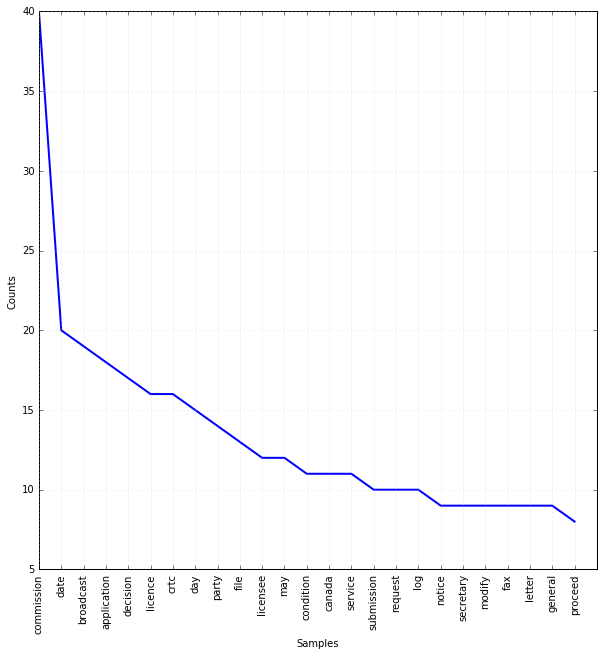

In [33]:
# frequency plot with stopwords removed
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)
fd = nltk.FreqDist(colText)
fd.plot(25)

In [34]:
# loads bigram code from NLTK
bigram_measures = nltk.collocations.BigramAssocMeasures()
# bigrams with a window size of 2 words
finder = BigramCollocationFinder.from_words(lems, window_size = 2)
# only bigrams that appear 4+ times
#finder.apply_freq_filter(4)
# only bigrams that contain 'privacy'
#finder.apply_ngram_filter(privacy_filter)

In [35]:
# filter results based on statistical test

# calulates the raw frequency as an actual number and percentage of total words
act = finder.ngram_fd.items()
raw = finder.score_ngrams(bigram_measures.raw_freq)
# log-likelihood ratio
log = finder.score_ngrams(bigram_measures.likelihood_ratio)

**Log-Likelihood Ratio**

The Log-likelihood ratio calculates the size and significance between the observed and expected frequencies of bigrams and assigns a score based on the result, taking into account the overall size of the corpus. The larger the difference between the observed and expected, the higher the score, and the more statistically significant the collocate is.
The Log-likelihood ratio is my preferred test for collocates because it does not rely on a normal distribution, and for this reason, it can account for sparse or low frequency bigrams (unlike the Chi-square). But unlike the PMI, it does not over-represent low frequency bigrams with inflated scores, as the test is only reporting how much more likely it is that the frequencies are different than they are the same. The drawback to the Log-likelihood ratio, much like the t-score, is that it cannot be used to compare scores across corpora.

In [36]:
print(tabulate(log, headers = ["Collocate", "Log-Likelihood"], floatfmt=".3f", numalign="left"))

Collocate                               Log-Likelihood
--------------------------------------  ----------------
('secretary', 'general')                106.213
('hustler', 'tv')                       64.902
('tv', 'x')                             64.902
('date', 'modify')                      63.123
('public', 'notice')                    55.245
('x', 'channel')                        54.317
('upon', 'request')                     51.039
('decision', 'crtc')                    50.734
('broadcast', 'day')                    49.840
('british', 'columbia')                 42.011
('tel', 'fax')                          41.971
('format', 'upon')                      37.622
('access', 'municipal')                 35.281
('alternative', 'format')               34.995
('available', 'alternative')            34.995
('definition', 'broadcast')             34.672
('email', 'address')                    33.015
('power', 'watt')                       33.015
('notice', 'crtc')                      3

---

In [ ]:
'''
subject_graph = nx.Graph()
for row in file:
    subject = row['keywords'].split(',')
    for n in range(len(subject)-1):
        for m in range(n, len(subject)):
            subject_graph.add_edge(subject[n], subject[m])
'''

In [ ]:
#subject_communities = nx.connected_component_subgraphs(subject_graph)

In [ ]:
#test = list(subject_communities)

In [ ]:
#nx.draw(test[0])
#plt.show()

In [ ]:
#all_words = list(sum(only_words, []))
#plot_all_words = nltk.Text(all_words)
#fd_all = nltk.FreqDist(plot_all_words)

In [ ]:
#%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 10.0)
#fd_all.plot(50,cumulative=False,)

In [45]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'no

In [46]:
print(len(stopwords))

153
